### Task : Classification ( Logistic Regression -> Binary )
#### Input Features (Predictor Variables) : radius, texture, perimeter, area... (30)
#### Output (Response Variable(s)) : Class (0 or 1)

### Importing the necessary modules

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics, preprocessing, model_selection, pipeline, base

### Collecting, Analyzing and Visualizing the data

In [3]:
data = datasets.load_breast_cancer()
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [8]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data[:, :-6], columns = data.feature_names[:-6])
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [11]:
# Checking for null values

any(np.sum(df.isna()))

False

In [18]:
# Pearson Correlation

corr_matrix = df.iloc[:, :-1].corr()
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854


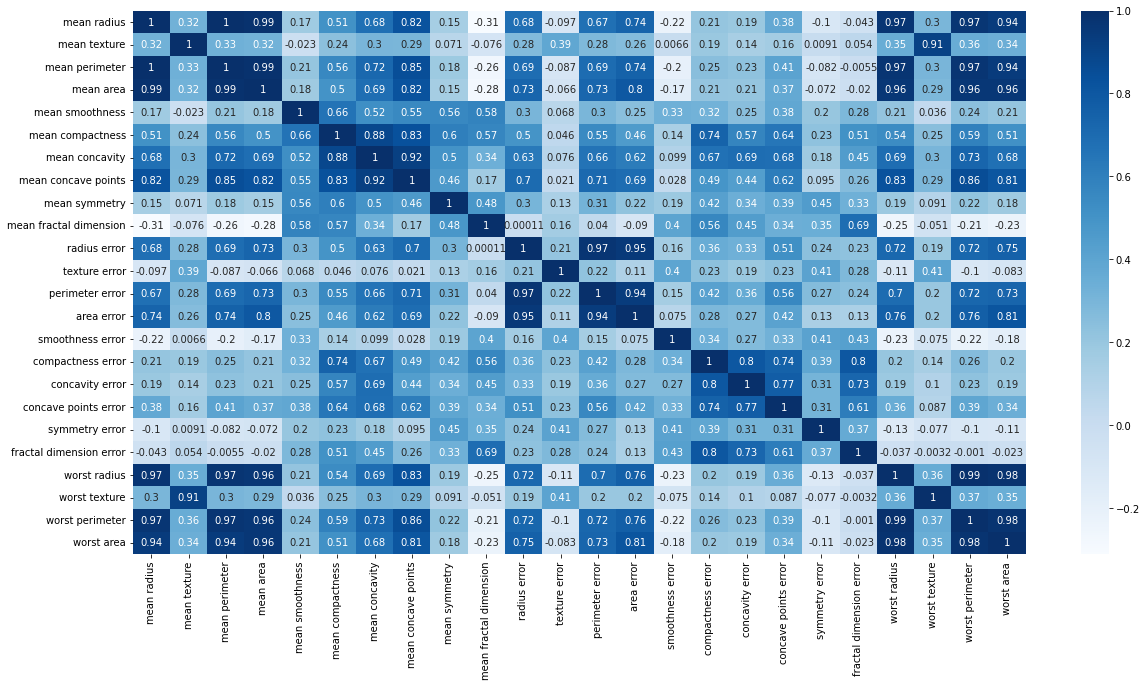

In [16]:
# Visualizing correlation matrix with a heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, cmap = plt.get_cmap('Blues'))
plt.show()

In [26]:
num_attr = df.columns[:-1]
target = df.columns[-1]
imp_attr = ['mean area', 'mean perimeter', 'worst area', 'worst perimeter']

In [32]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]

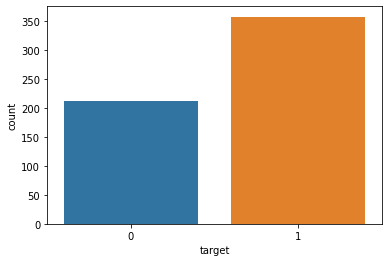

In [59]:
# Count Plot

sns.countplot(x = target, data = df)
plt.show()

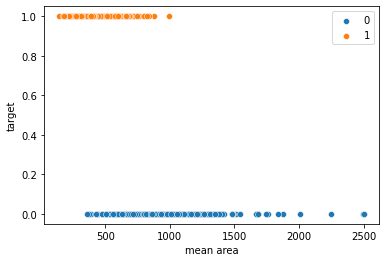

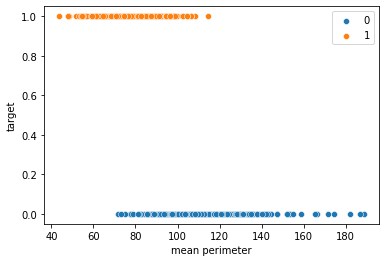

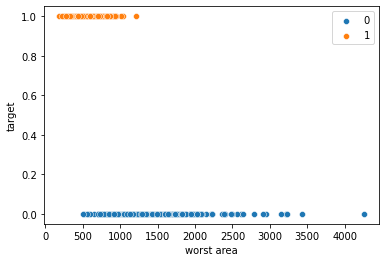

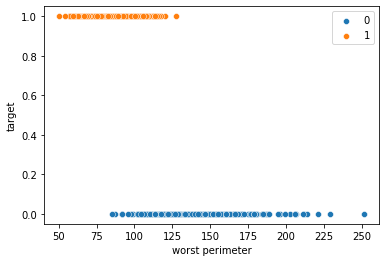

In [330]:
for attr in imp_attr:
    sns.scatterplot(x = attr, y = target, data = df0, label = '0')
    sns.scatterplot(x = attr, y = target, data = df1, label = '1')
    plt.legend()
    plt.show()

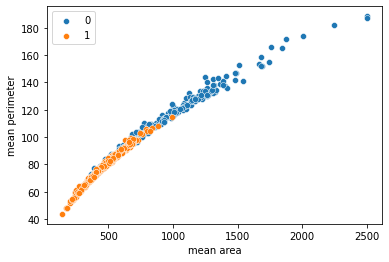

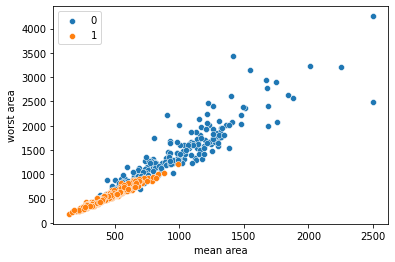

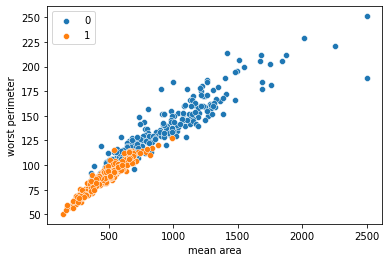

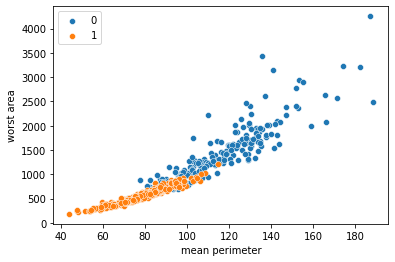

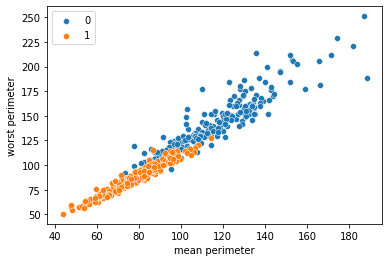

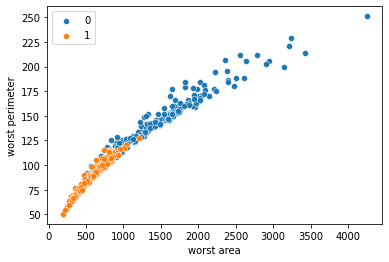

In [38]:
# Scatter Plot

for i in range(len(imp_attr)):
    for j in range(i + 1, len(imp_attr)):
        attr1, attr2 = imp_attr[i], imp_attr[j]
        sns.scatterplot(x = attr1, y = attr2, data = df0, label = '0')
        sns.scatterplot(x = attr1, y = attr2, data = df1, label = '1')
        plt.legend()
        plt.show()

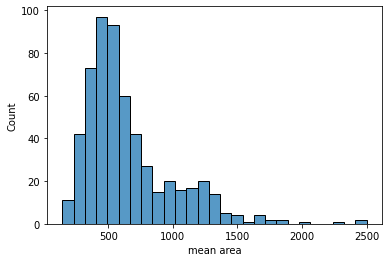

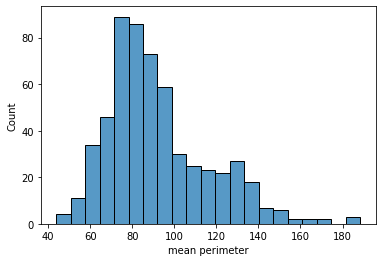

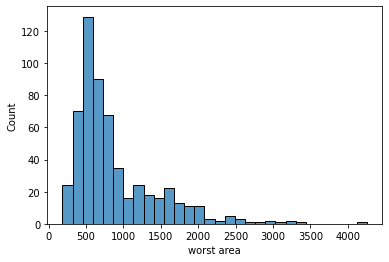

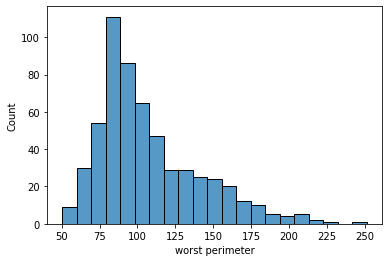

In [42]:
# Histogram

for attr in imp_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

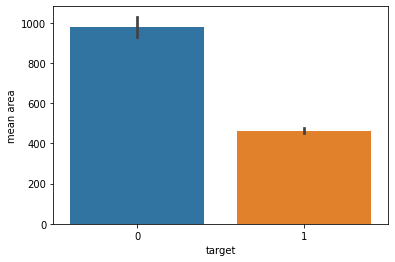

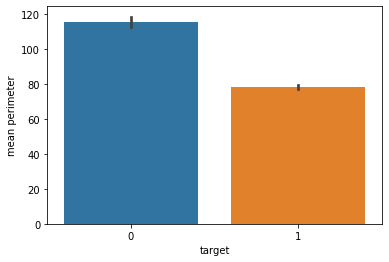

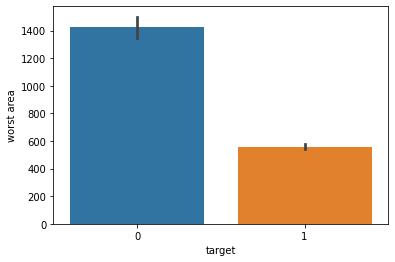

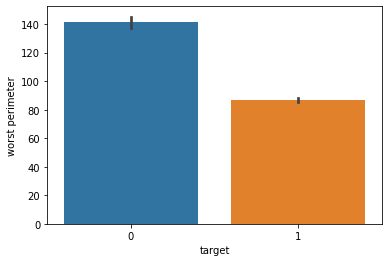

In [57]:
# Bar Chart

for attr in imp_attr:
    sns.barplot(x = target, y = attr, data = df)
    plt.show()

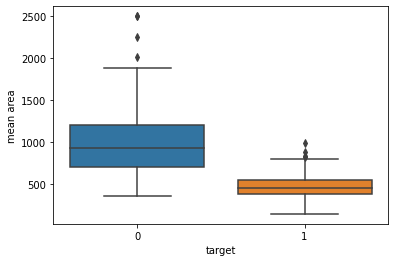

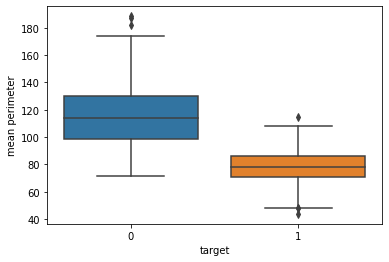

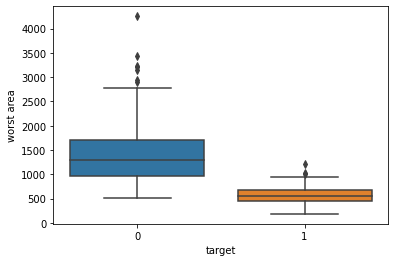

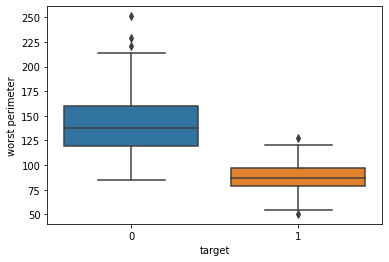

In [326]:
# Box Plot (Identifies Skewness)

for attr in imp_attr:
    sns.boxplot(x = target, y = attr, data = df)
    plt.show()

In [52]:
for attr in imp_attr:
    print(attr.upper() + " : ")
    print(df.groupby('target')[attr].mean(), '\n\n')

MEAN AREA : 
target
0    978.376415
1    462.790196
Name: mean area, dtype: float64 


MEAN PERIMETER : 
target
0    115.365377
1     78.075406
Name: mean perimeter, dtype: float64 


WORST AREA : 
target
0    1422.286321
1     558.899440
Name: worst area, dtype: float64 


WORST PERIMETER : 
target
0    141.370330
1     87.005938
Name: worst perimeter, dtype: float64 




mean area (Mean) : 


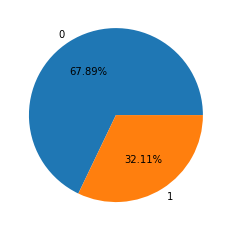

mean perimeter (Mean) : 


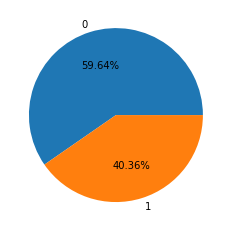

worst area (Mean) : 


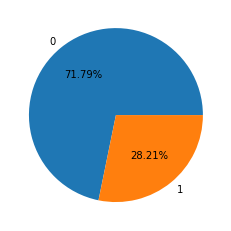

worst perimeter (Mean) : 


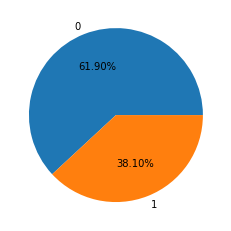

In [69]:
# Pie Chart

for attr in imp_attr:
    print(f"{attr} (Mean) : ")
    plt.pie(x = df.groupby('target')[attr].mean(), autopct = "%.2f%%", labels = np.unique(df[target]))
    plt.show()

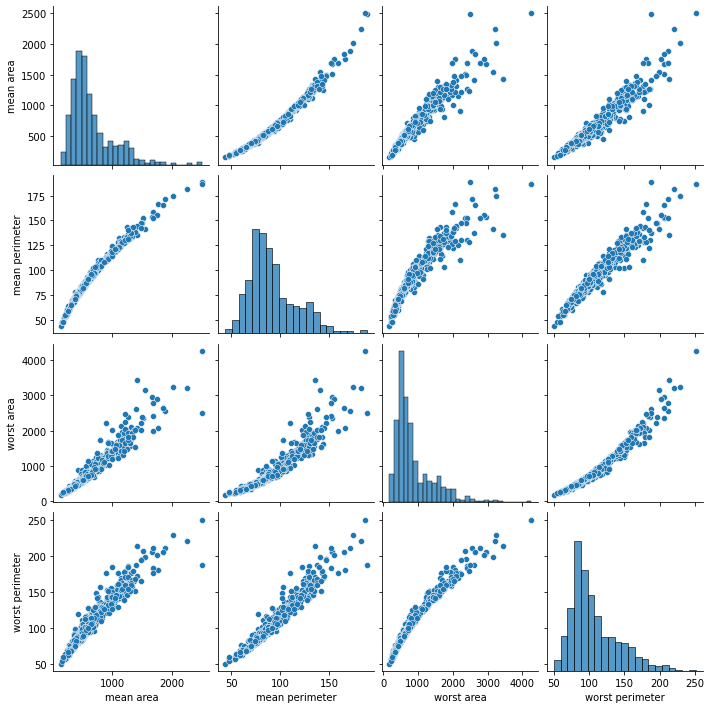

In [29]:
sns.pairplot(df.loc[:, imp_attr])
plt.show()

### Data Preprocessing and Preparation

In [75]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [90]:
# Stratified Shuffle Split

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[target]):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [98]:
print("Size of train set :", y_train.shape[0])
print("Size of test set :", y_test.shape[0])

Size of train set : 455
Size of test set : 114


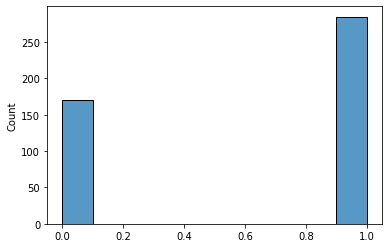

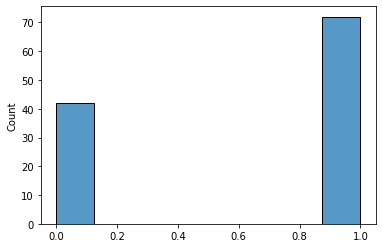

In [101]:
# Checking whether the samples are distributed uniformely

sns.histplot(y_train)
plt.show()

sns.histplot(y_test)
plt.show()

In [102]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [103]:
# Scaling the features (Standardization)

X_train_scaled = p.fit_transform(X_train)
X_test_scaled = p.fit_transform(X_test)

### Training the Model and Evaluating it's Performance

In [442]:
# Implementing Logistic Regression through Batch Gradient Descent

class LogisticRegression:
    
    def __init__(self, n_iter = 10000, lr = 0.0001, tolerance = 0.001):
        self.n_iter = n_iter
        self.lr = lr
        self.w = self.b = None
        self.tolerance = tolerance
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        present_cost = 0
        for i in range(self.n_iter):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)
            cost = (-1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            if (abs(cost - present_cost) < self.tolerance):
                break
            present_cost = cost
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        temp = self.sigmoid(z)
        y_pred = (temp > 0.5).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
        
    @staticmethod 
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [443]:
lg = LogisticRegression(n_iter = 10000, lr = 0.1, tolerance = 0.000002)

lg.fit(X_train_scaled, y_train)

print(lg.w, lg.b)

[ 0.13497329 -0.13242989  0.09068508 -0.17742614 -0.68482754  0.1043468
 -2.00481118 -1.34889482 -0.93711302 -0.28013575 -1.06176313  1.47034874
 -0.67187744 -0.90801509 -0.22015652  1.08386058 -0.34227199 -0.46443958
  0.51212215  1.12250692 -1.63623911 -2.59347999 -1.67792967 -1.57133584] 0.48694593597780933


In [444]:
y_train_pred = lg.predict(X_test_scaled)

train_score = lg.score(X_train_scaled, y_train)
print("Train Accuracy :", train_score)

Train Accuracy : 0.9868131868131869


#### Sklearn Implementation

In [445]:
# Implementing Logistic Regression through Sklearn

model = linear_model.LogisticRegression(max_iter = 1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [423]:
print(model.coef_, model.intercept_)

[[ 0.0303262  -0.15063379 -0.00212514 -0.18942577 -0.51182702  0.019234
  -1.51128729 -1.01518967 -0.69621555 -0.20866898 -0.82241542  1.04548904
  -0.49829794 -0.6770444  -0.11384252  0.72826757 -0.14240744 -0.42791333
   0.34712793  0.78238921 -1.27667452 -1.9787616  -1.32634485 -1.19316145]] [0.49433246]


In [424]:
y_train_pred = model.predict(X_train_scaled)

train_score = model.score(X_train_scaled, y_train)
print("Train Accuracy :", train_score)

Train Accuracy : 0.9868131868131869


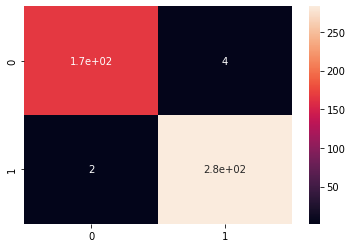

In [269]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [274]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0] 
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9860627177700348
Recall or Sensitivity : 0.9929824561403509
F1 Score : 0.9895104895104895


In [275]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       170
           1       0.99      0.99      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [287]:
y_desc_scores = model_selection.cross_val_predict(base.clone(model), X_train_scaled, y_train, method = 'decision_function')

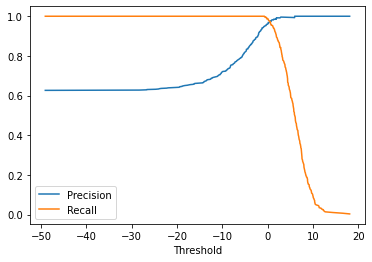

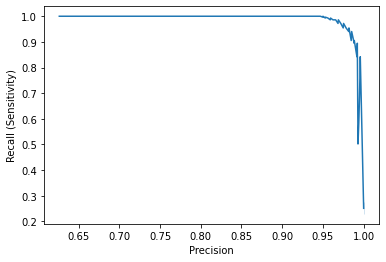

In [303]:
# Precision Recall Curve

precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_desc_scores)

plt.xlabel("Threshold")
sns.lineplot(x = thresholds, y = precisions[:-1], label = 'Precision')
sns.lineplot(x = thresholds, y = recalls[:-1], label = 'Recall')
plt.show()

plt.xlabel("Precision")
plt.ylabel("Recall (Sensitivity)")
sns.lineplot(x = precisions, y = recalls)
plt.show()

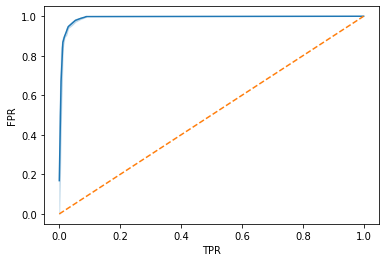

In [317]:
# Receiver Operator Characteristic Curve

tpr, fpr, thresholds = metrics.roc_curve(y_train, y_desc_scores)

plt.xlabel("TPR")
plt.ylabel("FPR")
sns.lineplot(x = tpr, y = fpr)
plt.plot([0, 1], [0, 1], '--')
plt.show()

In [311]:
# Area Under ROC Curve

auc = metrics.roc_auc_score(y_train, y_desc_scores)

print("Area Under ROC Curve :", auc)

Area Under ROC Curve : 0.9933952528379772


### Validating the model

In [399]:
y_test_pred = lg.predict(X_test_scaled)

test_score = metrics.accuracy_score(y_test, y_test_pred)

print("Test Accuracy :", test_score)

Test Accuracy : 0.9649122807017544


In [398]:
y_test_pred = model.predict(X_test_scaled)

test_score = metrics.accuracy_score(y_test, y_test_pred)

print("Test Accuracy :", test_score)

Test Accuracy : 0.9649122807017544


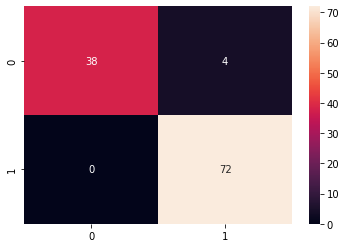

In [276]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [277]:
# Classification Metrics

tp, tn = conf_matrix[1][1], conf_matrix[0][0] 
fp, fn = conf_matrix[0][1], conf_matrix[1][0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9473684210526315
Recall or Sensitivity : 1.0
F1 Score : 0.972972972972973


In [278]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Cross Validation

In [322]:
X_scaled = p.fit_transform(X)

scores = model_selection.cross_val_score(base.clone(model), X_scaled, y, cv = 10)

print("Cross Validation Score :", np.sum(scores) / len(scores))

Cross Validation Score : 0.9701441102756891
